In [ ]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
src = "learn/slider.jpg"
horse = "learn/horse.jpeg"
out = "learn/slider_gray.jpg"
dir = "../dataset/"
result = "../output/"

os.makedirs(os.path.dirname(result), exist_ok=True)

In [28]:
img = cv2.imread(dir + horse, cv2.IMREAD_GRAYSCALE)

## Filtr konwolucyjny

In [29]:
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

filtered = cv2.filter2D(img, cv2.CV_64F, kernel)
filtered = cv2.convertScaleAbs(filtered)
filtered = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)


## Canny Edge detector

1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

In [30]:
edges = cv2.Canny(img, 100, 200)

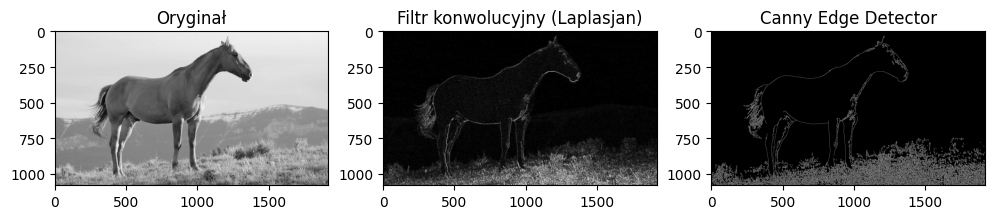

In [31]:
# Wyświetlanie
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Oryginał")
plt.subplot(1,3,2); plt.imshow(filtered, cmap='gray'); plt.title("Filtr konwolucyjny (Laplasjan)")
plt.subplot(1,3,3); plt.imshow(edges, cmap='gray'); plt.title("Canny Edge Detector")
plt.show()